# **Unemployment Analysis in India during covid**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the csv file into a pandas dataframe

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Renaming the attributes
1. Region = state
2. Date = date
3. Frequency = frequency
4. Estimated Unemployment Rate (%) = estimated unemployment rate
5. Estimated Employed = estimated employment
6. Estimated Labour Participation Rate (%) = estimated labour participation rate
7. Region.1 = region
8. longitude = longitude
9. latitude = latitude


Updating column names:

In [8]:
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Revealing basic information of the dataset

In [9]:
df.shape

(267, 9)

In [10]:
df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

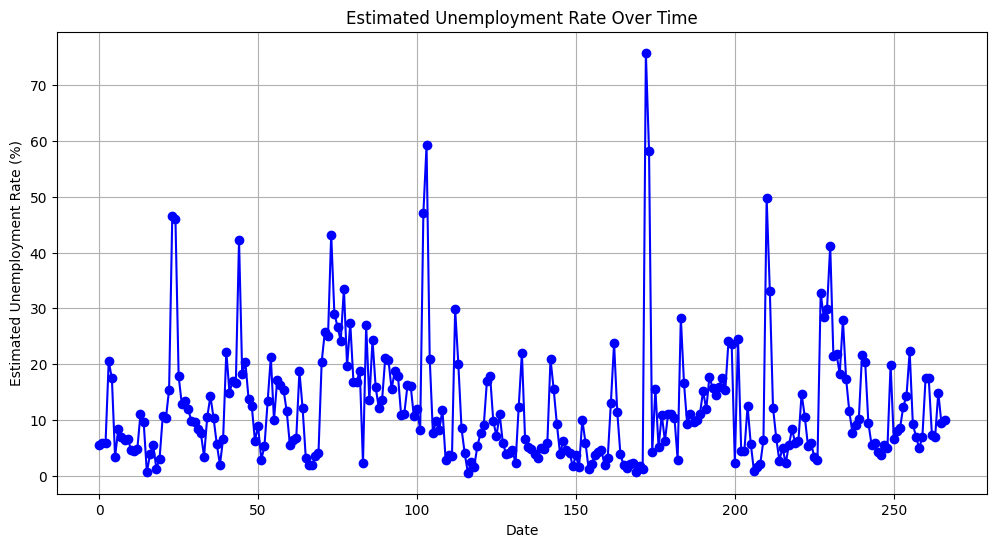

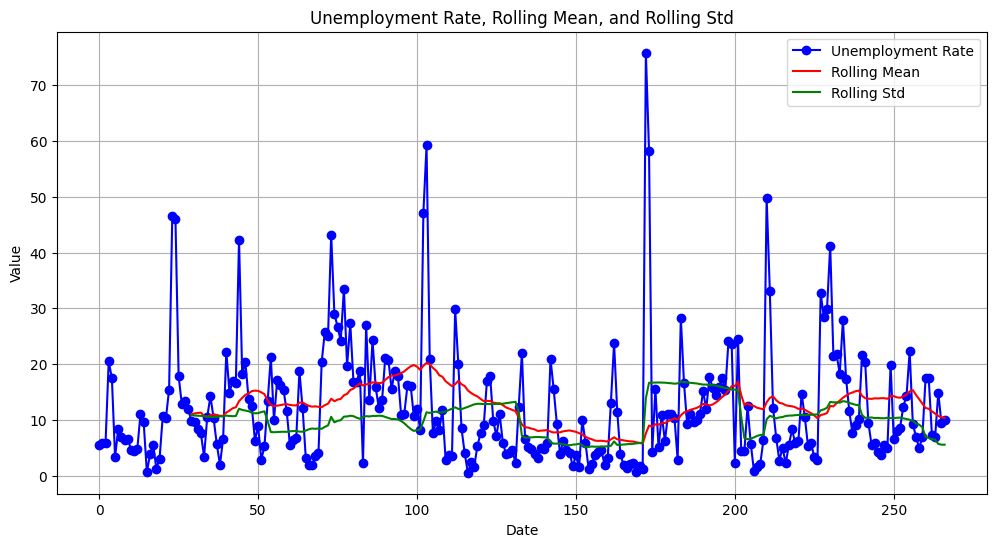

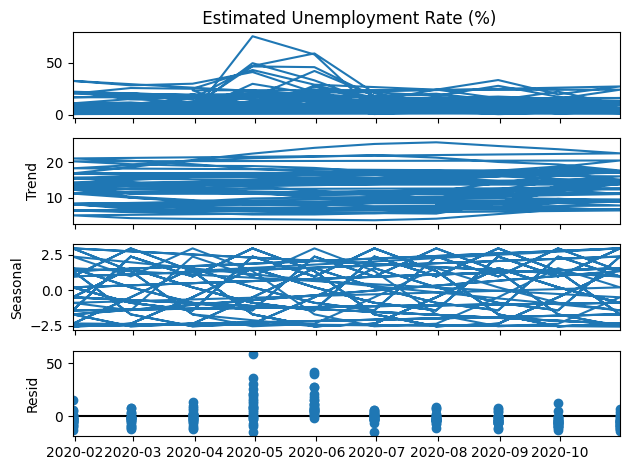

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Load Unemployment Data
data = pd.read_csv('/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv')

# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='b')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

window = 30
data['Rolling Mean'] = data[' Estimated Unemployment Rate (%)'].rolling(window=window).mean()
data['Rolling Std'] = data[' Estimated Unemployment Rate (%)'].rolling(window=window).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='b', label='Unemployment Rate')
plt.plot(data.index, data['Rolling Mean'], color='r', label='Rolling Mean')
plt.plot(data.index, data['Rolling Std'], color='g', label='Rolling Std')
plt.title('Unemployment Rate, Rolling Mean, and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

data[' Date'] = pd.to_datetime(data[' Date'])
data.set_index(' Date', inplace=True)

result = seasonal_decompose(data[' Estimated Unemployment Rate (%)'], model='additive', period=12)
result.plot()
plt.show()


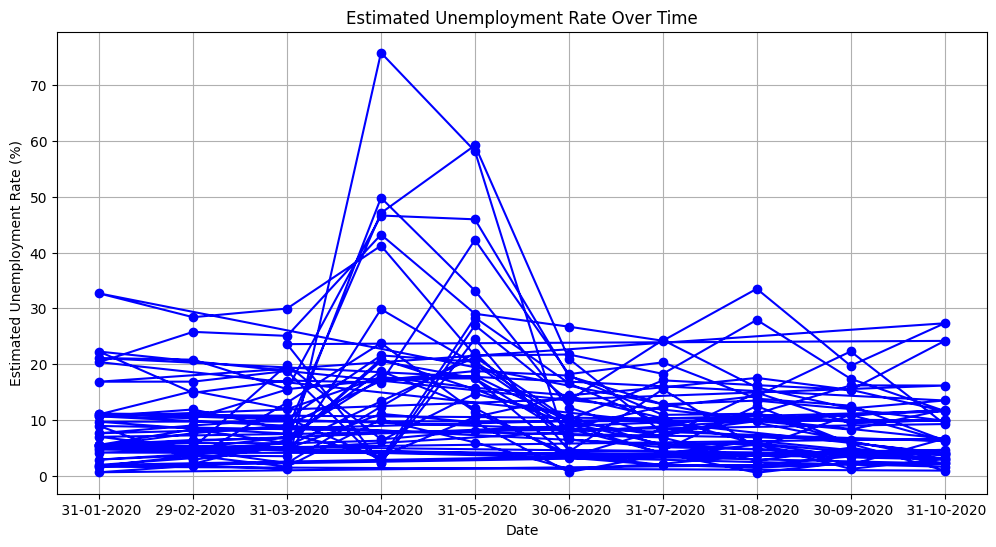

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv')

data.set_index(' Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='b')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [42]:
df.describe()

,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude,month_int
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


In [43]:
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
month_int                              0
month                                  0
dtype: int64

In [44]:
df.duplicated().any()

False

In [45]:
df.state.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

### Changing the datatype of 'date' from object to datetime

In [46]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                267 non-null    object        
 1   date                                 267 non-null    datetime64[ns]
 2   frequency                            267 non-null    object        
 3   estimated unemployment rate          267 non-null    float64       
 4   estimated employed                   267 non-null    int64         
 5   estimated labour participation rate  267 non-null    float64       
 6   region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   month_int                            267 non-null    int64         
 10  month         

### Extracting month from date attribute

In [47]:
df['month_int'] = df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


The months are in integer datetype. We need to convert the months into words for better analysis,

In [48]:
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


Numeric data grouped by months

In [49]:
data = df.groupby(['month'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
data=pd.DataFrame(data).reset_index()

Bar plot of unemployment rate and labour participation rate

In [50]:
month = data.month
unemployment_rate = data['estimated unemployment rate']
labour_participation_rate = data['estimated labour participation rate']

fig = go.Figure()

fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate'))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate'))

fig.update_layout(title = 'Unemployment Rate and Labour Participation',
                     xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

Bar plot of estimated employed citizen in every month

In [51]:
import plotly.express as px

In [52]:
fig = px.bar(data,x='month',y='estimated employed',color='month',
            category_orders ={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},
            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

## State wise Analysis

In [53]:
state =  df.groupby(['state'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
state = pd.DataFrame(state).reset_index()

In [54]:
fig = px.box(data_frame=df,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [55]:
fig = px.bar(state,x='state',y='estimated unemployment rate',color='state',title='Average unemployment rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

>  Hariyana and  Tripura were having the highest average amount of Unemployment rate




> Meghalaya was having the lowest average amount of Unemployment rate

In [56]:
fig = px.bar(df,x='state',y='estimated unemployment rate',animation_frame='month',color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020(State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


**Monthly unemployment rate**

In [57]:
fig=px.scatter_geo(df,'longitude','latitude',color='state',
                  hover_name='state',size='estimated unemployment rate',
                  animation_frame='month',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

## Regional Analysis

In [58]:
df.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [59]:
# numeric data grouped by region

region = df.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()

In [60]:
#Scatter plot

fig= px.scatter_matrix(df,dimensions=['estimated unemployment rate','estimated employed','estimated labour participation rate'],color='region')
fig.show()

In [61]:
# Average Unemployment Rate

fig = px.bar(region,x='region',y='estimated unemployment rate',color='region',title='Average unemployment rate(region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [62]:
fig = px.bar(df,x='region',y='estimated unemployment rate',animation_frame='month',color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000

fig.show()

In [63]:
unemployment =df.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()
unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [64]:
fig = px.sunburst(unemployment,path=['region','state'],values='estimated unemployment rate',
                 title ='Unemployment rate in state and region',height=600)
fig.show()

## Unemployment rate before and after Lockdown

In [65]:
# data representation before and after lockdown

before_lockdown = df[(df['month_int']>=1) &(df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >=4) & (df['month_int'] <=6)]

In [66]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [67]:
# unenployment rate change after lockdown

lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                              /lockdown['unemployment rate after lockdown'],2)

In [68]:
fig = px.bar(lockdown,x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()